# Deep Neural Network with Numpy

# To Do : Markdown, LateX

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
np.random.seed(9)
X = np.random.randint(-50000, 50000, 10000).reshape(-1,1)
y = X**2

## Activation Functions

In [3]:
data = np.arange(-10,10)

In [4]:
def relu(x):
    return np.where(x>0, x, 0)

def sigmoid(x):
    return (1/(1+np.exp(-x)))

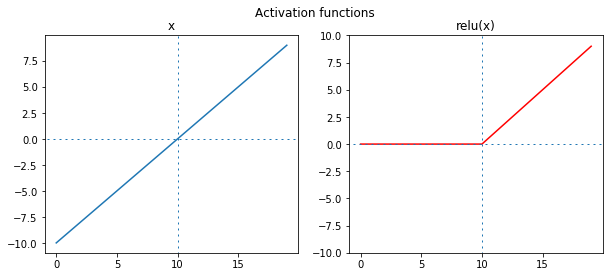

In [5]:
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
plt.plot(data)
plt.axhline(y=0, xmin=data[0], xmax=data[-1], dashes=[2, 4],linewidth=1)
plt.axvline(x=10, ymin=data[0], ymax=data[-1], dashes=[2, 4],linewidth=1)
plt.title("x")
fig.add_subplot(122)
plt.plot(relu(data), color="red")
plt.axhline(y=0, xmin=data[0], xmax=data[-1], dashes=[2, 4],linewidth=1)
plt.axvline(x=10, ymin=data[0], ymax=data[-1], dashes=[2, 4],linewidth=1)
plt.ylim(-10,10)
plt.title("relu(x)")
plt.suptitle("Activation functions")
plt.show()

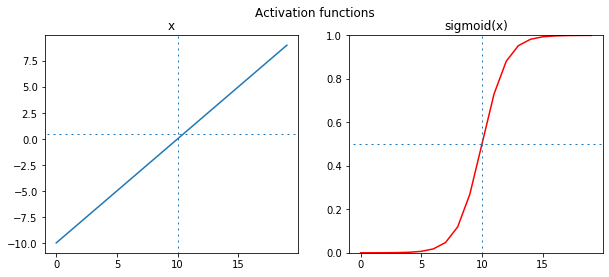

In [6]:
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
plt.plot(data)
plt.axhline(y=0.5, xmin=data[0], xmax=data[-1], dashes=[2, 4],linewidth=1)
plt.axvline(x=10, ymin=data[0], ymax=data[-1], dashes=[2, 4],linewidth=1)
plt.title("x")
fig.add_subplot(122)
plt.plot(sigmoid(data), color="red")
plt.axhline(y=0.5, xmin=data[0], xmax=data[-1], dashes=[2, 4],linewidth=1)
plt.axvline(x=10, ymin=data[0], ymax=data[-1], dashes=[2, 4],linewidth=1)
plt.ylim(0,1)
plt.title("sigmoid(x)")
plt.suptitle("Activation functions")
plt.show()

In [7]:
X = np.concatenate([X, [[1]]*X.shape[0]], axis =1)
y = y.reshape(-1,1)

In [8]:
X.shape

(10000, 2)

# Loss

In [9]:
def compute_loss(y_true, y_pred):
    return np.mean(np.square(y_pred-y_true))/2

# Equations of the neural network for forward propogation

$Layer 1 :  H1 = XW_1 $ <br>
$Activation 1: A1 = relu(H1) $ <br>
$Layer 2: H2 = H1W_2 $  (Hidden Layer) <br>

In [10]:
from sklearn.model_selection import train_test_split
train_X = X[X[:,0]%2==1]
train_y = y[X[:,0]%2==1]
test_X = X[X[:,0]%2==0]
test_y = y[X[:,0]%2==0]

In [11]:
X_max = np.max(train_X, axis = 0 )
y_max = np.max(train_y)

train_X = train_X/X_max
test_X = test_X/X_max

train_y = train_y/y_max
test_y = test_y/y_max


# Weight Initialization

In [12]:
def initialize_weights(d0, d1):
    return np.random.randn(d0, d1)

# Forward Propogation

In [13]:
def forward(X):
    model["H1"] = np.dot(X, model["W1"]) # (batch_size, hidden_units)
    model["A1"] = relu(model["H1"]) # (batch_size, hidden_units)
    model["H2"] = np.dot(model["A1"], model["W2"]) # (batch_size, 1)
    return model

# Backward Propogation

In [14]:
def backward(X, y_true):
    model["dH2"] = (model["H2"]-y_true)/y_true.shape[0]   # 5000,1
    model["dW2"] = np.dot(model["A1"].T, model["dH2"]) # 32,1
    model["dA1"] = np.dot(model["dH2"], model["W2"].T) # 5000, 32
    model["dH1"] = model["dA1"].copy()
    model["dH1"] = np.where(model["H1"]>0, model["dH1"], 0) # 5000, 32
    model["dW1"] = np.dot(X.T, model["dH1"]) #(7, 32) 

    return model

# Train

## Get batches

In [15]:
def generate_batches(features, target, batch_idx, mini_batch_size):

    batch_X = features[batch_idx*mini_batch_size: (batch_idx+1)*mini_batch_size]
    batch_y = target[batch_idx*mini_batch_size: (batch_idx+1)*mini_batch_size]
    yield batch_X, batch_y

In [16]:
hidden_units = 32

In [17]:
from tqdm import tqdm
#np.random.seed(0)
W1 = initialize_weights(X.shape[1], hidden_units)
#np.random.seed(1)
W2 = initialize_weights(hidden_units, y.shape[1])
model = dict()
model["W1"] = W1
model["W2"] = W2

In [18]:
def shuffle_dataset(features, target):
    indices = np.arange(0, train_X.shape[0])
    shuffled_indices = np.random.choice(a=indices, size=len(indices))
    return features[shuffled_indices], target[shuffled_indices]

100%|██████████| 50/50 [00:00<00:00, 130.42it/s]


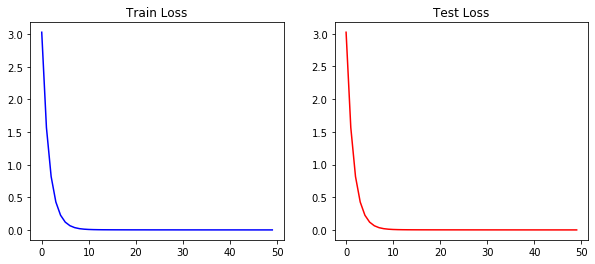

In [19]:
loss_all = []
epochs = 50
mini_batch_size = 32
lr=1e-4

break_flag=0
for epoch in tqdm(range(epochs)): # for each epoch
    observations = train_X.shape[0]
    iterations = (observations//mini_batch_size)-1
    iteration=0

    train_X, train_y = shuffle_dataset(train_X, train_y)

    while iteration<=iterations: 
        # for each mini batch
        for batch_X, batch_y in generate_batches(train_X, train_y, iteration, mini_batch_size):
            
            model = forward(batch_X)
            model = backward(batch_X, batch_y) 
            model["W1"]=model["W1"]-lr*model["dW1"]
            model["W2"]=model["W2"]-lr*model["dW2"]
            model["dW1"] = 0
            model["dW2"] = 0
        iteration+=1

        
    for phase in ["train", "test"]:  
        if phase == "train":
            train_y_pred = forward(train_X)["H2"]
            train_epoch_loss = compute_loss(train_y, train_y_pred)
        else:
            test_y_pred = forward(test_X)["H2"]
            test_epoch_loss = compute_loss(test_y, test_y_pred)
                
    # Collecting Loss Values
    loss_all.append((train_epoch_loss, test_epoch_loss))
    all_losses = np.array(loss_all)
    
    """
    if epoch>5:
        if all_losses[-7][0]-all_losses[-1][0]<1e-15:
            break_flag=1
    if break_flag:
        break
    
    """
fig = plt.figure(figsize=(10, 4))
fig.add_subplot(121)
plt.title("Train Loss")
plt.plot(np.array(loss_all)[:,0], color="blue")
fig.add_subplot(122)
plt.title("Test Loss")
plt.plot(np.array(loss_all)[:,1], color= "red")



In [20]:
loss_all

[(3.0275722532278633, 3.0228782483551093),
 (1.5688011526177748, 1.5658599327035212),
 (0.8187504043153431, 0.8171363677826887),
 (0.42965282635238805, 0.4287744092980952),
 (0.22721826439560033, 0.22659127323753805),
 (0.12095595046044734, 0.1212173192771887),
 (0.06629694017502527, 0.06580214619272166),
 (0.037103649783436325, 0.036618970344324035),
 (0.021481691057467132, 0.021303481197607586),
 (0.013316770054273064, 0.013225276106294608),
 (0.00892036509647003, 0.008919871292113328),
 (0.006511677288170105, 0.006620173583406531),
 (0.00519395291483439, 0.0053598553885767924),
 (0.004412608070825941, 0.004647321720957403),
 (0.004019032690084946, 0.004220217062962068),
 (0.0036804173477688992, 0.003943416329898961),
 (0.0034253220403385664, 0.0037572206335483756),
 (0.003330493038236109, 0.003612017532894306),
 (0.003152589483107533, 0.00349803891496854),
 (0.0029718203172719635, 0.00340741954625961),
 (0.0029271441571056094, 0.003327947886774337),
 (0.0029110591150027097, 0.003254

# Plot predicted values

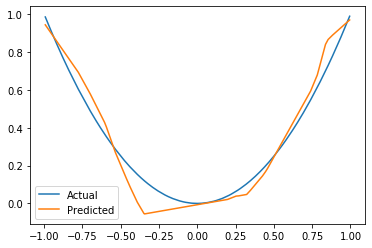

In [21]:
sort_index = np.argsort(train_X[:,0], axis =0)

pred = forward(train_X[sort_index, :])["H2"]
plt.plot(train_X[sort_index, 0], train_y[sort_index])
plt.plot(train_X[sort_index, 0], pred)
plt.legend(["Actual", "Predicted"])
plt.show()

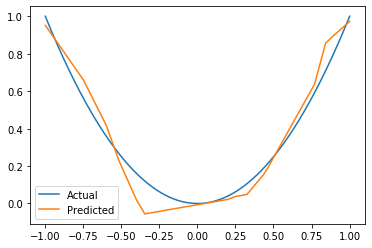

In [22]:
sort_index = np.argsort(test_X[:,0], axis =0)

pred = forward(test_X[sort_index, :])["H2"]
plt.plot(test_X[sort_index, 0], test_y[sort_index])
plt.plot(test_X[sort_index, 0], pred)
plt.legend(["Actual", "Predicted"])
plt.show()

# R2 Squared

In [23]:
from sklearn.metrics import r2_score

pred = forward(train_X)["H2"]

r2_score(train_y, pred)

0.9505527464201737

In [24]:
from sklearn.metrics import r2_score

pred = forward(test_X)["H2"]

r2_score(test_y, pred)

0.9477700873498263

# Pytorch Implementation - verification

In [25]:
from torch import nn
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import SGD, Adam

In [26]:
model_torch = nn.Sequential(nn.Linear(in_features=1,out_features=hidden_units),
                            nn.ReLU(),
                            nn.Linear(in_features=hidden_units,out_features=1))
model_torch

Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=1, bias=True)
)

In [27]:
train_X.shape, train_y.shape

((5036, 2), (5036, 1))

In [28]:
dataset = TensorDataset(torch.from_numpy(train_X[:,0:1]), torch.from_numpy(train_y))

loader = DataLoader(dataset, batch_size=32,
                    pin_memory=True, shuffle=False)


In [29]:
criterion = nn.MSELoss(reduce="mean")
optimizer = SGD(params = model_torch.parameters(), lr=1e-3)

/Applications/anaconda3/envs/pytorch_nlp_book/lib/python3.8/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [30]:
hidden_units = 32

In [31]:
epochs = 50
for epoch in range(epochs):
    for batch_idx , (batch_X, batch_y) in enumerate(loader):
        optimizer.zero_grad()
        batch_y_pred = model_torch(batch_X.float())
        loss = criterion(batch_y_pred.float(), batch_y.float())
        loss.backward()
        optimizer.step()
    if epoch%(epochs//10)==0:
        print(epoch, loss.item())

0 0.08900140970945358
5 0.062159597873687744
10 0.05347646400332451
15 0.046524494886398315
20 0.040117617696523666
25 0.03421497717499733
30 0.02882770262658596
35 0.024097857996821404
40 0.01998324878513813
45 0.01641850546002388


In [32]:
pred = model_torch(torch.tensor(train_X[:,0:1]).float()).detach().numpy()

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score(train_y, pred)

0.7959508886242266

In [35]:
loss

tensor(0.0140, grad_fn=<MseLossBackward>)

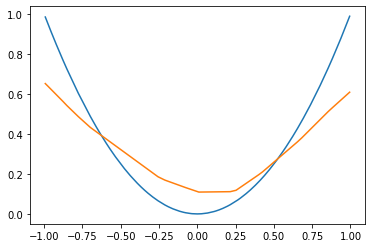

In [36]:
sort_index = np.argsort(train_X[:,0], axis =0)


plt.plot(train_X[sort_index,0], train_y[sort_index])
plt.plot(train_X[sort_index,0], pred[sort_index])

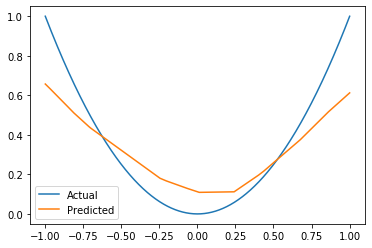

In [37]:
sort_index = np.argsort(test_X[:,0], axis =0)

pred = model_torch(torch.tensor(test_X[:,0:1]).float()).detach().numpy()
plt.plot(test_X[sort_index, 0], test_y[sort_index])
plt.plot(test_X[sort_index, 0], pred[sort_index])
plt.legend(["Actual", "Predicted"])
plt.show()

In [39]:
sort_index = np.argsort(test_X[:,0], axis =0)



In [40]:
sort_index

array([1139, 2064, 1858, ...,  432, 3482, 1566])

In [41]:
r2_score(test_y, pred)

0.8293507837513996

In [42]:
loss_all[-1]

(0.004863785615546157, 0.0050687012329183444)